In [7]:
import pandas as pd
import matplotlib.pyplot as plt

#Loading data
df = pd.read_csv("hf://datasets/lukebarousse/data_jobs/data_jobs.csv")

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [8]:
##Code from Previous File i.e. 6_Exercise.., we have already this Pivot and graphed it to check 
# how the DataScience jobs are trending. 
# Code is same as previous but filtering to US as the next dataframe we will be loading is of US
df_US = df[df['job_country']=='United States'].copy()
df_US['posted_month'] = df_US['job_posted_date'].dt.strftime('%B')
df_US_pivot = df_US.pivot_table(index='posted_month', columns='job_title_short', aggfunc='size')
df_US_pivot.reset_index(inplace=True)
df_US_pivot['month_no'] = pd.to_datetime(df_US_pivot['posted_month'], format='%B').dt.month
df_US_pivot.sort_values('month_no', inplace=True)
df_US_pivot.set_index('posted_month', inplace=True)
df_US_pivot.drop(columns='month_no', inplace=True)
df_US_pivot


job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


In [ ]:
##Now, this is not all the tech jobs that are out there, we are going to compare 
# how the data science jobs are trending with other software development jobs in Tech industries

#Loading the dataset. we are saying pivot coz its ready made dataset
#used index_col='job_posted_month' to let know that job_posted_month is our index
df_US_software_pivot = pd.read_csv('https://lukeb.co/software_csv', index_col='job_posted_month')

#Renaming the axis here that is index coz previously in job_demand exercise I had named it as posted_month
#and in this new dataset its as job_posted_month
df_US_software_pivot = df_US_software_pivot.rename_axis("posted_month")

df_US_software_pivot


,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [ ]:
#Merging. IF column names are not same we will suse Left_on and Right_on
#if the column names were same I could have used just on='column name'
df_US_Merged = df_US_pivot.merge(df_US_software_pivot, on='posted_month')
df_US_Merged

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
posted_month,,,,,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114,13619,9827,5108,4348
February,447,24,6124,3060,4956,56,1258,878,1127,90,11456,9116,7298,4284
March,438,19,6218,3183,4779,59,1114,829,1150,115,11102,8178,5814,4159
April,565,40,6049,2801,4867,51,1025,781,991,112,14037,9209,7232,4220
May,279,20,4993,2976,4377,49,839,746,914,90,12126,8864,6718,4980
June,446,32,5683,2893,4645,48,1009,812,1033,93,12003,8065,5902,4781
July,581,39,5201,2570,4876,65,883,747,1095,153,11914,8061,6839,4344
August,903,39,6634,3269,6318,68,1186,903,1515,194,11571,8191,7413,4104
September,897,50,4639,3224,4568,113,805,775,1014,228,14016,8447,6139,4094


In [ ]:
#Taking the top5
#We took the sum then the top 5 and then sorted it in descending order
#We have taken sum here because previously we had column name refer to cell 62 and 64 of previous exercise i.e. 6
 
top5 = df_US_Merged.sum().head(5).sort_values(ascending=False)
top5

Data Analyst        67816
Data Scientist      58830
Data Engineer       35080
Business Analyst     7382
Cloud Engineer        423
dtype: int64

In [ ]:
# now above just gives series and we cant plot without it. 
# Hence we are adding .index and then converted it to list
top5 = df_US_Merged.sum().head(5).sort_values(ascending=False).index.to_list()
top5

['Data Analyst',
 'Data Scientist',
 'Data Engineer',
 'Business Analyst',
 'Cloud Engineer']

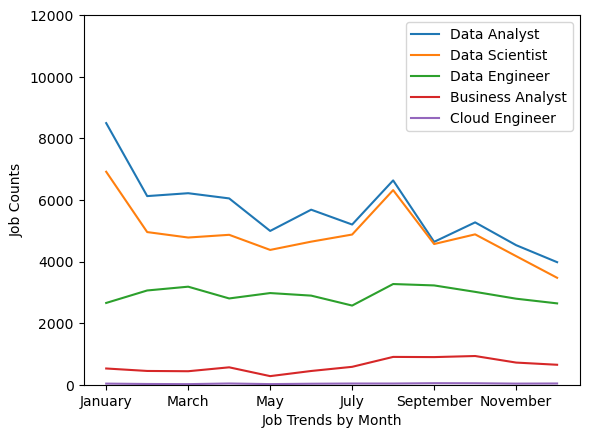

In [28]:
df_US_Merged[top5].plot(kind='line')
plt.xlabel('Job Trends by Month')
plt.ylabel('Job Counts')
plt.ylim(0,12000)
plt.legend()
plt.show()